# Árvores II - Tarefa I

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [6]:
features_path = "features.txt"

# Carregando os nomes das variáveis
features = pd.read_csv(features_path, sep="\s+", header=None, usecols=[1], names=["feature_names"])
features = features["feature_names"]

# Tornar os nomes únicos (adicionando um sufixo para duplicados)
features = features + "_" + features.groupby(features).cumcount().astype(str)
print(features.head())  # Exibe os 5 primeiros nomes

0    tBodyAcc-mean()-X_0
1    tBodyAcc-mean()-Y_0
2    tBodyAcc-mean()-Z_0
3     tBodyAcc-std()-X_0
4     tBodyAcc-std()-Y_0
dtype: object


In [7]:
# Caminho para o arquivo
subject_train_path = "subject_train.txt"

# Carregando os identificadores dos sujeitos
subject_train = pd.read_csv(subject_train_path, header=None, names=["subject"])
print(subject_train.head())  # Exibe os primeiros registros

   subject
0        1
1        1
2        1
3        1
4        1


In [8]:
# Caminho para o arquivo
x_train_path = "X_train.txt"

# Carregando os dados de treino com nomes das colunas
X_train = pd.read_csv(x_train_path, sep="\s+", header=None, names=features)

# Adicionando o identificador do sujeito
X_train["subject"] = subject_train

# Criando o índice duplo
X_train.set_index([X_train.index, "subject"], inplace=True)
print(X_train.head())

           tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0  \
  subject                                                                  
0 1                   0.288585            -0.020294            -0.132905   
1 1                   0.278419            -0.016411            -0.123520   
2 1                   0.279653            -0.019467            -0.113462   
3 1                   0.279174            -0.026201            -0.123283   
4 1                   0.276629            -0.016570            -0.115362   

           tBodyAcc-std()-X_0  tBodyAcc-std()-Y_0  tBodyAcc-std()-Z_0  \
  subject                                                               
0 1                 -0.995279           -0.983111           -0.913526   
1 1                 -0.998245           -0.975300           -0.960322   
2 1                 -0.995380           -0.967187           -0.978944   
3 1                 -0.996091           -0.983403           -0.990675   
4 1                 -0.998139

In [9]:
# Caminhos para os arquivos
x_test_path = "X_test.txt"
subject_test_path = "subject_test.txt"

# Carregando os identificadores dos sujeitos de teste
subject_test = pd.read_csv(subject_test_path, header=None, names=["subject"])

# Carregando os dados de teste com nomes das colunas
X_test = pd.read_csv(x_test_path, sep="\s+", header=None, names=features)

# Adicionando o identificador do sujeito
X_test["subject"] = subject_test

# Criando o índice duplo
X_test.set_index([X_test.index, "subject"], inplace=True)
print(X_test.head())

           tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0  \
  subject                                                                  
0 2                   0.257178            -0.023285            -0.014654   
1 2                   0.286027            -0.013163            -0.119083   
2 2                   0.275485            -0.026050            -0.118152   
3 2                   0.270298            -0.032614            -0.117520   
4 2                   0.274833            -0.027848            -0.129527   

           tBodyAcc-std()-X_0  tBodyAcc-std()-Y_0  tBodyAcc-std()-Z_0  \
  subject                                                               
0 2                 -0.938404           -0.920091           -0.667683   
1 2                 -0.975415           -0.967458           -0.944958   
2 2                 -0.993819           -0.969926           -0.962748   
3 2                 -0.994743           -0.973268           -0.967091   
4 2                 -0.993852

In [14]:
# Salvando as bases em arquivos CSV
X_train.to_csv("X_train_prepared.csv", index=True)
X_test.to_csv("X_test_prepared.csv", index=True)

In [15]:
# Verificar os nomes reais das colunas no DataFrame
matching_columns = [col for col in X_train.columns if 'tBodyAcc-mean()-X' in col or
                    'tBodyAcc-mean()-Y' in col or
                    'tBodyAcc-mean()-Z' in col]
print("Colunas correspondentes encontradas:", matching_columns)

# Selecionar as três colunas encontradas
X_train_selected = X_train[matching_columns]
X_test_selected = X_test[matching_columns]

# Exibir os dados selecionados
print("Treino selecionado:\n", X_train_selected.head())
print("Teste selecionado:\n", X_test_selected.head())

# Salvar os dados selecionados em arquivos CSV
X_train_selected.to_csv("X_train_selected.csv", index=False)
X_test_selected.to_csv("X_test_selected.csv", index=False)

Colunas correspondentes encontradas: ['tBodyAcc-mean()-X_0', 'tBodyAcc-mean()-Y_0', 'tBodyAcc-mean()-Z_0']
Treino selecionado:
            tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0
  subject                                                               
0 1                   0.288585            -0.020294            -0.132905
1 1                   0.278419            -0.016411            -0.123520
2 1                   0.279653            -0.019467            -0.113462
3 1                   0.279174            -0.026201            -0.123283
4 1                   0.276629            -0.016570            -0.115362
Teste selecionado:
            tBodyAcc-mean()-X_0  tBodyAcc-mean()-Y_0  tBodyAcc-mean()-Z_0
  subject                                                               
0 2                   0.257178            -0.023285            -0.014654
1 2                   0.286027            -0.013163            -0.119083
2 2                   0.275485            -0.0260

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [19]:
# Carregar y_train.txt como uma Series
y_train = pd.read_csv("y_train.txt", header=None)[0]

# Exibir as primeiras linhas para confirmar
print("y_train:\n", y_train.head())

print("Número de linhas em X_train_selected:", X_train_selected.shape[0])
print("Número de linhas em y_train:", y_train.shape[0])

y_train:
 0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64
Número de linhas em X_train_selected: 7352
Número de linhas em y_train: 7352


In [20]:
# Ajustando a árvore de decisão
tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree.fit(X_train_selected, y_train)

# Verificando a profundidade da árvore e o número de folhas
print("Profundidade da árvore:", tree.get_depth())
print("Número de folhas:", tree.get_n_leaves())

Profundidade da árvore: 18
Número de folhas: 279


In [21]:
# Calculando os valores de ccp_alpha e impurezas correspondentes
ccp_path = tree.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = ccp_path.ccp_alphas

# Filtrando valores positivos e únicos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])
print("Valores únicos de ccp_alpha (positivos):", ccp_alphas)

Valores únicos de ccp_alpha (positivos): [6.96674540e-06 1.12766571e-05 2.02554065e-05 2.72034820e-05
 2.84988860e-05 4.63397246e-05 5.35004552e-05 5.84401136e-05
 6.17808017e-05 6.59866112e-05 6.73768888e-05 7.02851049e-05
 7.74168145e-05 7.99585551e-05 8.01474017e-05 8.28222484e-05
 8.29342439e-05 8.49667199e-05 9.21474511e-05 9.63598696e-05
 1.02953015e-04 1.04280015e-04 1.05722623e-04 1.06211126e-04
 1.10109332e-04 1.20580361e-04 1.24186720e-04 1.32053657e-04
 1.35233977e-04 1.36017410e-04 1.41963138e-04 1.46351627e-04
 1.47352194e-04 1.49492770e-04 1.50482754e-04 1.51968146e-04
 1.55713461e-04 1.60511546e-04 1.60628990e-04 1.64239147e-04
 1.67323005e-04 1.74342668e-04 1.74907961e-04 1.75578030e-04
 1.78985873e-04 1.81439304e-04 1.85996704e-04 1.87333070e-04
 1.89065980e-04 1.89796602e-04 1.96526409e-04 1.96759215e-04
 2.01481091e-04 2.01919050e-04 2.02866775e-04 2.03119333e-04
 2.03378413e-04 2.03817707e-04 2.04208078e-04 2.05459167e-04
 2.05888258e-04 2.06087949e-04 2.07617553e-0

In [22]:
# Selecionando 1 a cada 5 valores de ccp_alpha
ccp_alphas_reduced = ccp_alphas[::5]
print("ccp_alphas reduzidos (1 a cada 5):", ccp_alphas_reduced)

ccp_alphas reduzidos (1 a cada 5): [6.96674540e-06 4.63397246e-05 6.73768888e-05 8.28222484e-05
 1.02953015e-04 1.20580361e-04 1.41963138e-04 1.51968146e-04
 1.67323005e-04 1.81439304e-04 1.96526409e-04 2.03119333e-04
 2.05888258e-04 2.11960464e-04 2.26826797e-04 2.39444770e-04
 2.47932477e-04 2.52885177e-04 2.62495937e-04 2.73408734e-04
 2.83037295e-04 2.87980319e-04 3.13171720e-04 3.26787621e-04
 3.51668945e-04 3.73564446e-04 3.99220300e-04 4.29862753e-04
 4.51528412e-04 4.63079099e-04 4.87208882e-04 5.11794978e-04
 5.25732429e-04 5.56286552e-04 6.37883381e-04 7.02050790e-04
 7.53735819e-04 8.64950391e-04 9.29376560e-04 1.13240843e-03
 1.24197638e-03 1.65230695e-03 2.18765587e-03 2.66788979e-03
 3.13001880e-03 4.73006126e-03 1.05395082e-02]


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [24]:
# Usando %%time para medir o tempo de execução
%%time

# Lista para armazenar as árvores treinadas
trees = []

# Rodando uma árvore para cada valor de ccp_alpha
for ccp_alpha in ccp_alphas_reduced:
    tree = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train_selected, y_train)
    trees.append(tree)

print(f"{len(trees)} árvores foram treinadas com diferentes valores de ccp_alpha.")

47 árvores foram treinadas com diferentes valores de ccp_alpha.
CPU times: user 1.85 s, sys: 0 ns, total: 1.85 s
Wall time: 1.86 s


In [27]:
# Carregando y_test.txt como uma Series
y_test = pd.read_csv("y_test.txt", header=None)[0]

# Exibindo as primeiras linhas para confirmar
print("y_test:\n", y_test.head())

y_test:
 0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64


In [28]:
# Listas para armazenar as acurácias
train_accuracies = []
test_accuracies = []

# Calculando a acurácia para cada árvore
for tree in trees:
    # Acurácia na base de treinamento
    train_accuracy = accuracy_score(y_train, tree.predict(X_train_selected))
    train_accuracies.append(train_accuracy)

    # Acurácia na base de teste
    test_accuracy = accuracy_score(y_test, tree.predict(X_test_selected))
    test_accuracies.append(test_accuracy)

# Exibindo as acurácias
print("Acurácias de treinamento:", train_accuracies)
print("Acurácias de teste:", test_accuracies)

Acurácias de treinamento: [0.5640642002176278, 0.5640642002176278, 0.5640642002176278, 0.5640642002176278, 0.5636561479869423, 0.5631120783460283, 0.5627040261153428, 0.5622959738846572, 0.5614798694232862, 0.5607997823721437, 0.5597116430903155, 0.5588955386289445, 0.558215451577802, 0.5567192600652884, 0.5556311207834603, 0.5529107725788901, 0.5529107725788901, 0.5526387377584331, 0.5508705114254625, 0.5501904243743199, 0.5499183895538629, 0.5473340587595212, 0.5459738846572362, 0.54379760609358, 0.5412132752992383, 0.5391730141458106, 0.5360446137105549, 0.5281556039173014, 0.5236670293797606, 0.5229869423286181, 0.5171381936887922, 0.5133297062023939, 0.5118335146898803, 0.5085690968443961, 0.5068008705114254, 0.5023122959738846, 0.4968715995647443, 0.4929270946681175, 0.49020674646354734, 0.4835418933623504, 0.47470076169749725, 0.46517954298150166, 0.44912948857453755, 0.4400163220892274, 0.43321545157780195, 0.39921109902067464, 0.3023667029379761]
Acurácias de teste: [0.4394299

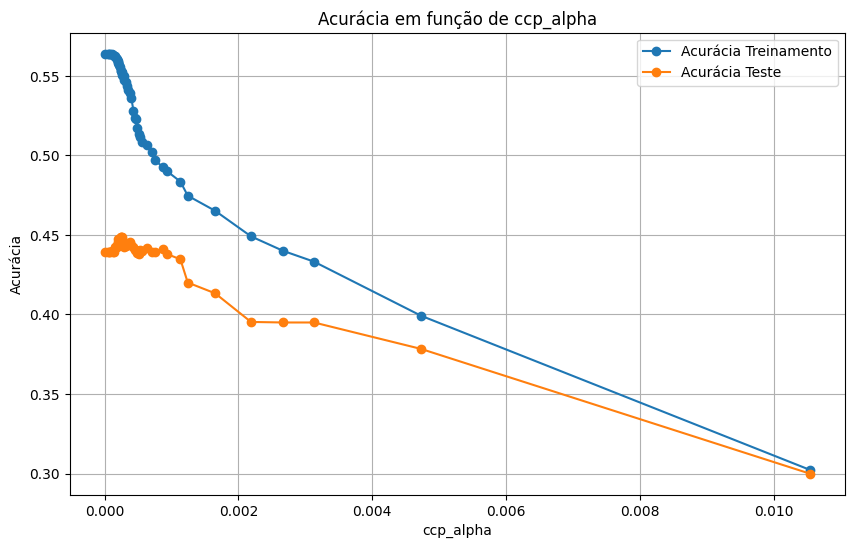

In [30]:
# Plotando as acurácias
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_reduced, train_accuracies, label="Acurácia Treinamento", marker='o')
plt.plot(ccp_alphas_reduced, test_accuracies, label="Acurácia Teste", marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia em função de ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Encontrando o índice do melhor valor de ccp_alpha baseado na acurácia de teste
best_index = np.argmax(test_accuracies)
best_tree = trees[best_index]
best_ccp_alpha = ccp_alphas_reduced[best_index]

print("Melhor valor de ccp_alpha:", best_ccp_alpha)
print("Acurácia na base de teste para a melhor árvore:", test_accuracies[best_index])

Melhor valor de ccp_alpha: 0.00023944476959803082
Acurácia na base de teste para a melhor árvore: 0.44859178825924667


In [32]:
# Melhor acurácia que se pode obter
best_test_accuracy = max(test_accuracies)
print("Melhor acurácia na base de teste:", best_test_accuracy)

Melhor acurácia na base de teste: 0.44859178825924667
